# **Trabajo Final**

## **Creación de los almacenes y puntos de entrega**

In [285]:
import numpy as np
import numpy.random as npr
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [286]:
def generarAlmacenes(cantidad):
  almacenes = npr.randint(0, 1000, (cantidad, 2), dtype=np.int)
  return almacenes

def generarPuntos(cantidad):
  puntos = npr.randint(0, 1000, (cantidad, 2), dtype=np.int)
  return puntos

almacenes = generarAlmacenes(50)
puntos = generarPuntos(2500)

In [287]:
for i, _ in enumerate(puntos):
  while puntos[i] in almacenes:
    puntos[i] = npr.randint(0, 1000, (1, 2), dtype=np.int)


In [288]:
np.savetxt('puntos.csv', puntos, fmt="%i", delimiter=",", comments="")
np.savetxt('almacenes.csv', almacenes, fmt="%i", delimiter=",", comments="")

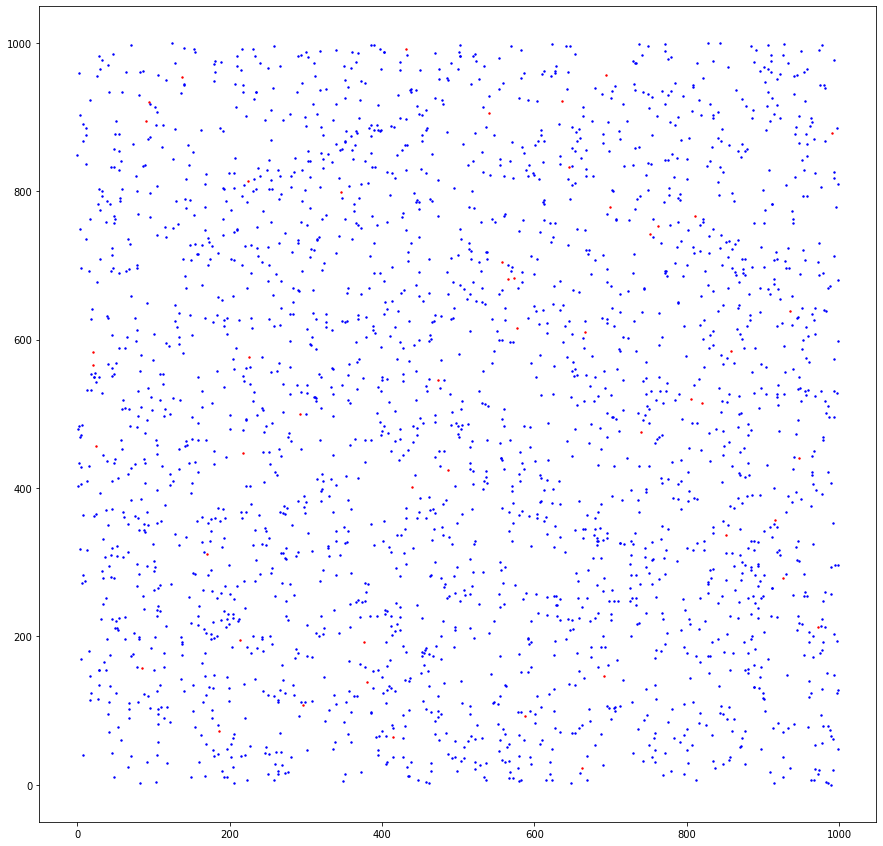

In [290]:
almacenes = pd.read_csv("almacenes.csv", header=None).to_numpy()
puntos = pd.read_csv("puntos.csv", header=None).to_numpy()
plt.figure(figsize=(15, 15))
plt.scatter(almacenes[:, 0], almacenes[:, 1], 2, c="red")
plt.scatter(puntos[:, 0], puntos[:, 1], 2, c="blue")
plt.show() 

## Creación de secciones

In [291]:
def dist(a, b):
  xa, ya = a
  xb, yb = b
  return abs(xa - xb) + abs(ya - yb)

In [292]:
groups = [0]*len(puntos)

for i, a in enumerate(puntos):
  group = 0
  mindist = dist(a, almacenes[0])
  for j, b in enumerate(almacenes):
    d = dist(a, b)
    if d < mindist:
      mindist = d
      group = j
  groups[i] = group

In [293]:
counts = [0]*len(almacenes)

for g in groups:
  counts[g] += 1

print(groups[:20])

[40, 0, 1, 13, 20, 0, 46, 22, 12, 0, 30, 38, 9, 4, 27, 49, 33, 32, 20, 49]


In [294]:
puntos2 = np.c_[puntos, groups]
print(puntos2[:10])

[[827 834  40]
 [355 669   0]
 [188 259   1]
 [236 752  13]
 [933 724  20]
 [319 806   0]
 [848  95  46]
 [184  42  22]
 [498 293  12]
 [327 938   0]]


In [295]:
dfpuntos = pd.DataFrame(puntos2)
dfpuntos.head()

,0,1,2
0,827,834,40
1,355,669,0
2,188,259,1
3,236,752,13
4,933,724,20


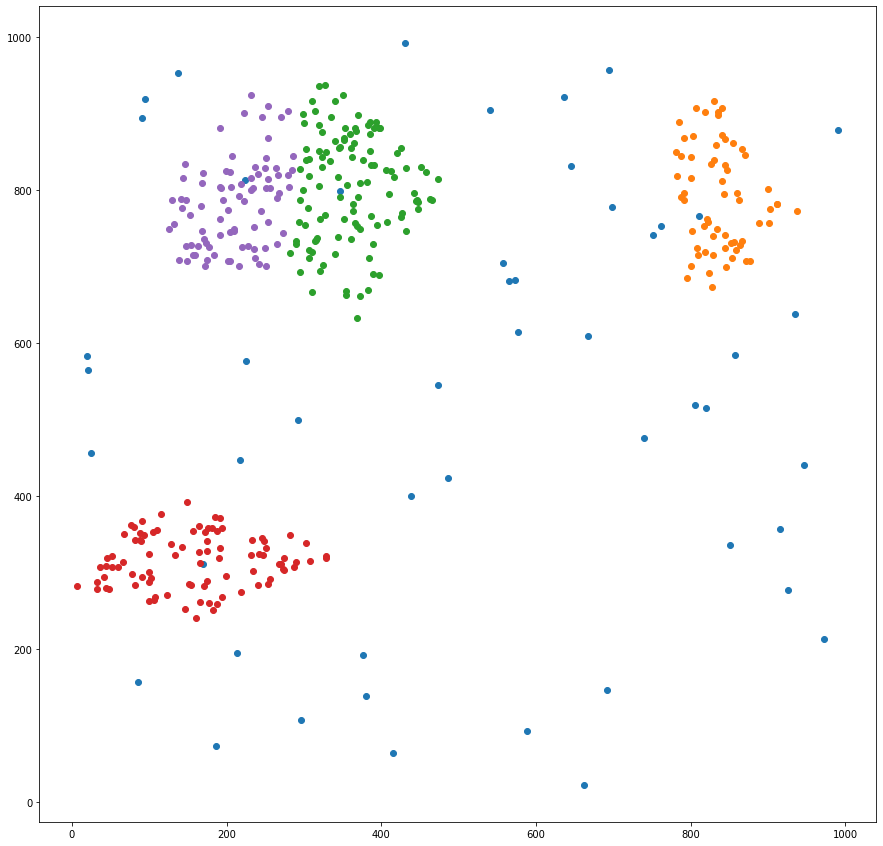

In [296]:
plt.subplots(figsize=(15, 15))

show = groups[:4]

plt.scatter(almacenes[:, 0], almacenes[:, 1])
for alm in show:
  dftemp = dfpuntos[dfpuntos[2] == alm]
  plt.scatter(dftemp[0], dftemp[1])

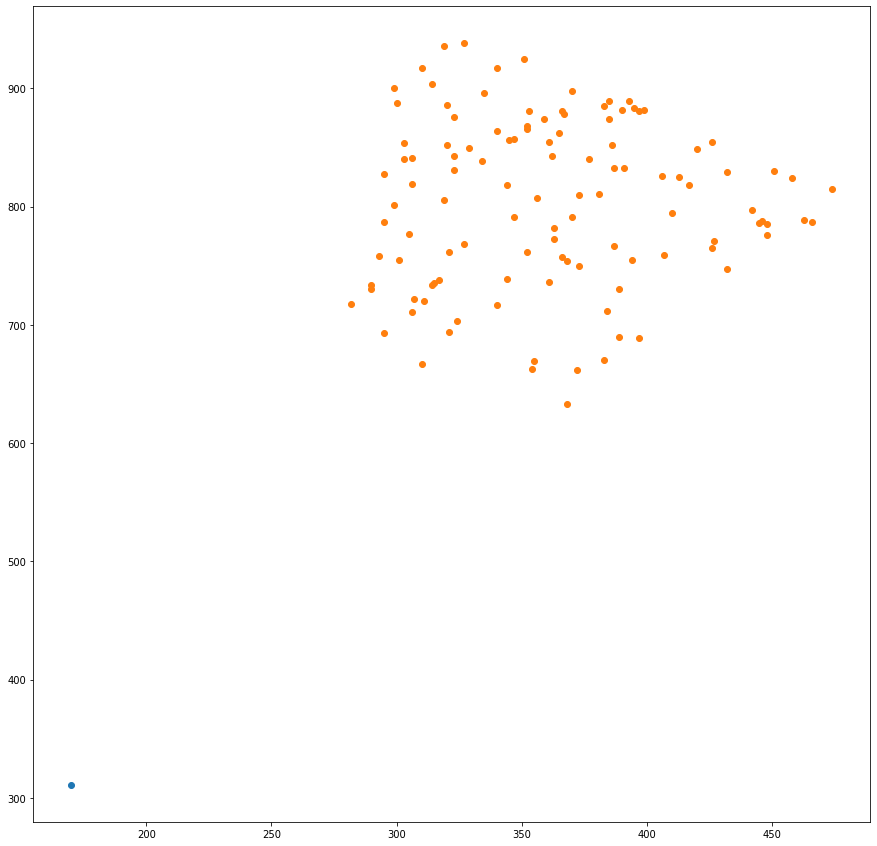

In [297]:
plt.subplots(figsize=(15, 15))

plt.scatter(almacenes[1, 0], almacenes[1, 1])

dftemp = dfpuntos[dfpuntos[2] == show[1]]
plt.scatter(dftemp[0], dftemp[1])

In [298]:
def escribirArchivo(cabezera, datos, archivo):
  with open(archivo, 'w') as a:
    write = csv.writer(a)
    if cabezera != None: write.writerow(cabezera)
    write.writerows(datos)

In [299]:
ciudad = list()
ciudad.extend(puntos2)
ciudad.sort(key = lambda x: (x[0], x[1])) #Ordenar de mayor a menor los puntos
escribirArchivo(None, ciudad, 'ciudad.csv') 

## Creación del grafo de la ciudad

In [300]:
import math
import graphviz as gv
import pandas as pd

In [301]:
ciudad = pd.read_csv("ciudad.csv", header=None).to_numpy()

In [302]:
print(ciudad[:40])

[[  0 849   9]
 [  1 402  47]
 [  1 479  47]
 [  2 433  47]
 [  2 483  47]
 [  2 959  26]
 [  3 318  47]
 [  4 468  47]
 [  4 749   5]
 [  4 902   9]
 [  5 169  21]
 [  5 405  47]
 [  5 428  47]
 [  5 471  47]
 [  5 696   5]
 [  6 272  21]
 [  6 485  47]
 [  7  40  21]
 [  7 283   1]
 [  7 363  47]
 [  7 867   9]
 [  7 890   9]
 [ 10 275  21]
 [ 11 736   5]
 [ 11 836   9]
 [ 11 876   9]
 [ 11 885   9]
 [ 12 316  47]
 [ 12 532  31]
 [ 13 409  47]
 [ 15 180  21]
 [ 15 429  47]
 [ 15 693   5]
 [ 16 762   5]
 [ 16 923  26]
 [ 17 114  21]
 [ 17 146  21]
 [ 18 124  21]
 [ 18 532  31]
 [ 18 554  31]]


In [303]:
grafoCiudad=[[] for _ in range(len(ciudad))]

In [304]:
for i,_ in enumerate(ciudad):
    grafoCiudad[int(ciudad[i][0])].append(int(ciudad[i][1]))

## Implementación de algoritmos

### Función para graficar grafos

In [305]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "5"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="blue")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(1))
        elif directed:
          g.edge(str(u), str(v), str(1))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

### Algoritmo Bellman Ford

In [306]:
def bellmanFord(G, s):
  n = len(G)
  for node in range(n):
    cost[node] = float('inf')
    parent[node] = None
  
  cost[s] = 0
  
  # relax
  for _ in range(n-1):
    for current in range(n):
      for v in G[current]:
        if cost[current] + 1 < cost[v]:
          cost[v] = cost[current] + 1
          parent[v] = current
      

  # check negative cycle
  for current in range(n):
    for v in G[current]:
      if cost[current] + 1 < cost[v]:
        return None, None

  return parent, cost

In [307]:
parent, cost = bellmanFord(grafoCiudad, 0)

In [308]:
print(parent)
print(cost)

[None, None, 648, 205, 983, 349, 536, 258, None, 572, 192, 197, 434, 769, 796, 973, 660, 373, 263, 464, 974, 522, 579, None, 433, None, 528, 690, 876, 464, 758, 406, 834, 558, 856, None, 492, 594, 755, 179, 7, None, 251, 246, 261, 553, None, 301, 999, None, None, 248, 871, 807, 750, 608, 977, 106, 359, 513, 57, None, 522, 531, None, 392, 990, 833, 561, 687, 649, 42, 877, None, 988, 736, 627, 933, 959, 986, 663, 185, 106, 816, 122, 350, 325, 744, 700, 853, 114, 474, 291, None, 976, 106, 516, 844, 579, 903, 474, 177, 106, None, 96, 110, 845, None, None, 339, 505, 263, 547, 454, 17, 27, 902, 900, 961, 604, 474, 169, 87, 997, 51, None, 244, 356, 406, 626, 412, 178, 888, 409, 758, 562, 219, 481, None, None, 961, 716, 136, None, 437, 324, 17, None, 180, 543, 829, 984, 592, 460, 28, 877, 880, None, 898, 114, 406, 269, 697, 371, 163, None, 817, None, 708, 478, None, 759, 674, 71, 828, 43, 461, 228, 114, 849, 244, 978, None, 890, 97, 223, 693, 428, None, None, 256, None, 833, None, 997, None, N

In [309]:
adjlShow(grafoCiudad, path=cost)